##### Approach:

###### 1. Data Collection
###### 2. Dataset Cleaning
###### 3. EDA on cleaned data
###### 4. Visualizing Data distribution and outliers 
###### 5. Applying Isolation Forest Algorithm
###### 6. Applying One-Class SVM Algorithm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("hardware_monitor_data_cleaned.csv")
df.head(5)

,timestamp,cpu_temperature,cpu_usage,cpu_load,memory_usage,battery_level,cpu_power
0,2024-11-28 13:14:41.736121,66.0,4.00000,0.0,87.1,100.0,32.005280
1,2024-11-28 13:14:41.736121,66.0,4.00000,0.0,87.1,100.0,32.005280
2,2024-11-28 13:14:42.272383,71.0,92.93786,0.0,87.1,100.0,28.754457
3,2024-11-28 13:14:41.736121,66.0,4.00000,0.0,87.1,100.0,32.005280
4,2024-11-28 13:14:42.272383,71.0,92.93786,0.0,87.1,100.0,28.754457


### EDA

In [3]:
df.shape

(17302606, 7)

In [4]:
df.columns

Index(['timestamp', 'cpu_temperature', 'cpu_usage', 'cpu_load', 'memory_usage',
       'battery_level', 'cpu_power'],
      dtype='object')

In [5]:
df.describe()

,cpu_temperature,cpu_usage,cpu_load,memory_usage,battery_level,cpu_power
count,1.730261e+07,1.730261e+07,1.730261e+07,1.730261e+07,1.730261e+07,1.730261e+07
mean,6.431042e+01,1.395073e+01,7.258282e-03,8.295086e+01,9.872661e+01,2.235248e+01
std,6.870433e+00,2.775856e+01,1.828412e-02,3.593450e+00,1.094730e+01,6.440145e+00
min,5.000000e+01,0.000000e+00,0.000000e+00,7.610000e+01,1.369206e-01,1.807527e+01
25%,6.100000e+01,2.000000e+00,0.000000e+00,7.970000e+01,1.000000e+02,1.998825e+01
50%,6.400000e+01,4.200000e+00,0.000000e+00,8.390000e+01,1.000000e+02,2.078665e+01
75%,6.800000e+01,7.700000e+00,0.000000e+00,8.530000e+01,1.000000e+02,2.208694e+01
max,1.049058e+02,9.994515e+01,2.400000e-01,9.997598e+01,1.000000e+02,9.997595e+01


In [6]:
df.isnull().sum()
# As the data is made by us there are no null values in the dataset

timestamp          0
cpu_temperature    0
cpu_usage          0
cpu_load           0
memory_usage       0
battery_level      0
cpu_power          0
dtype: int64

In [7]:
df.dtypes

timestamp           object
cpu_temperature    float64
cpu_usage          float64
cpu_load           float64
memory_usage       float64
battery_level      float64
cpu_power          float64
dtype: object

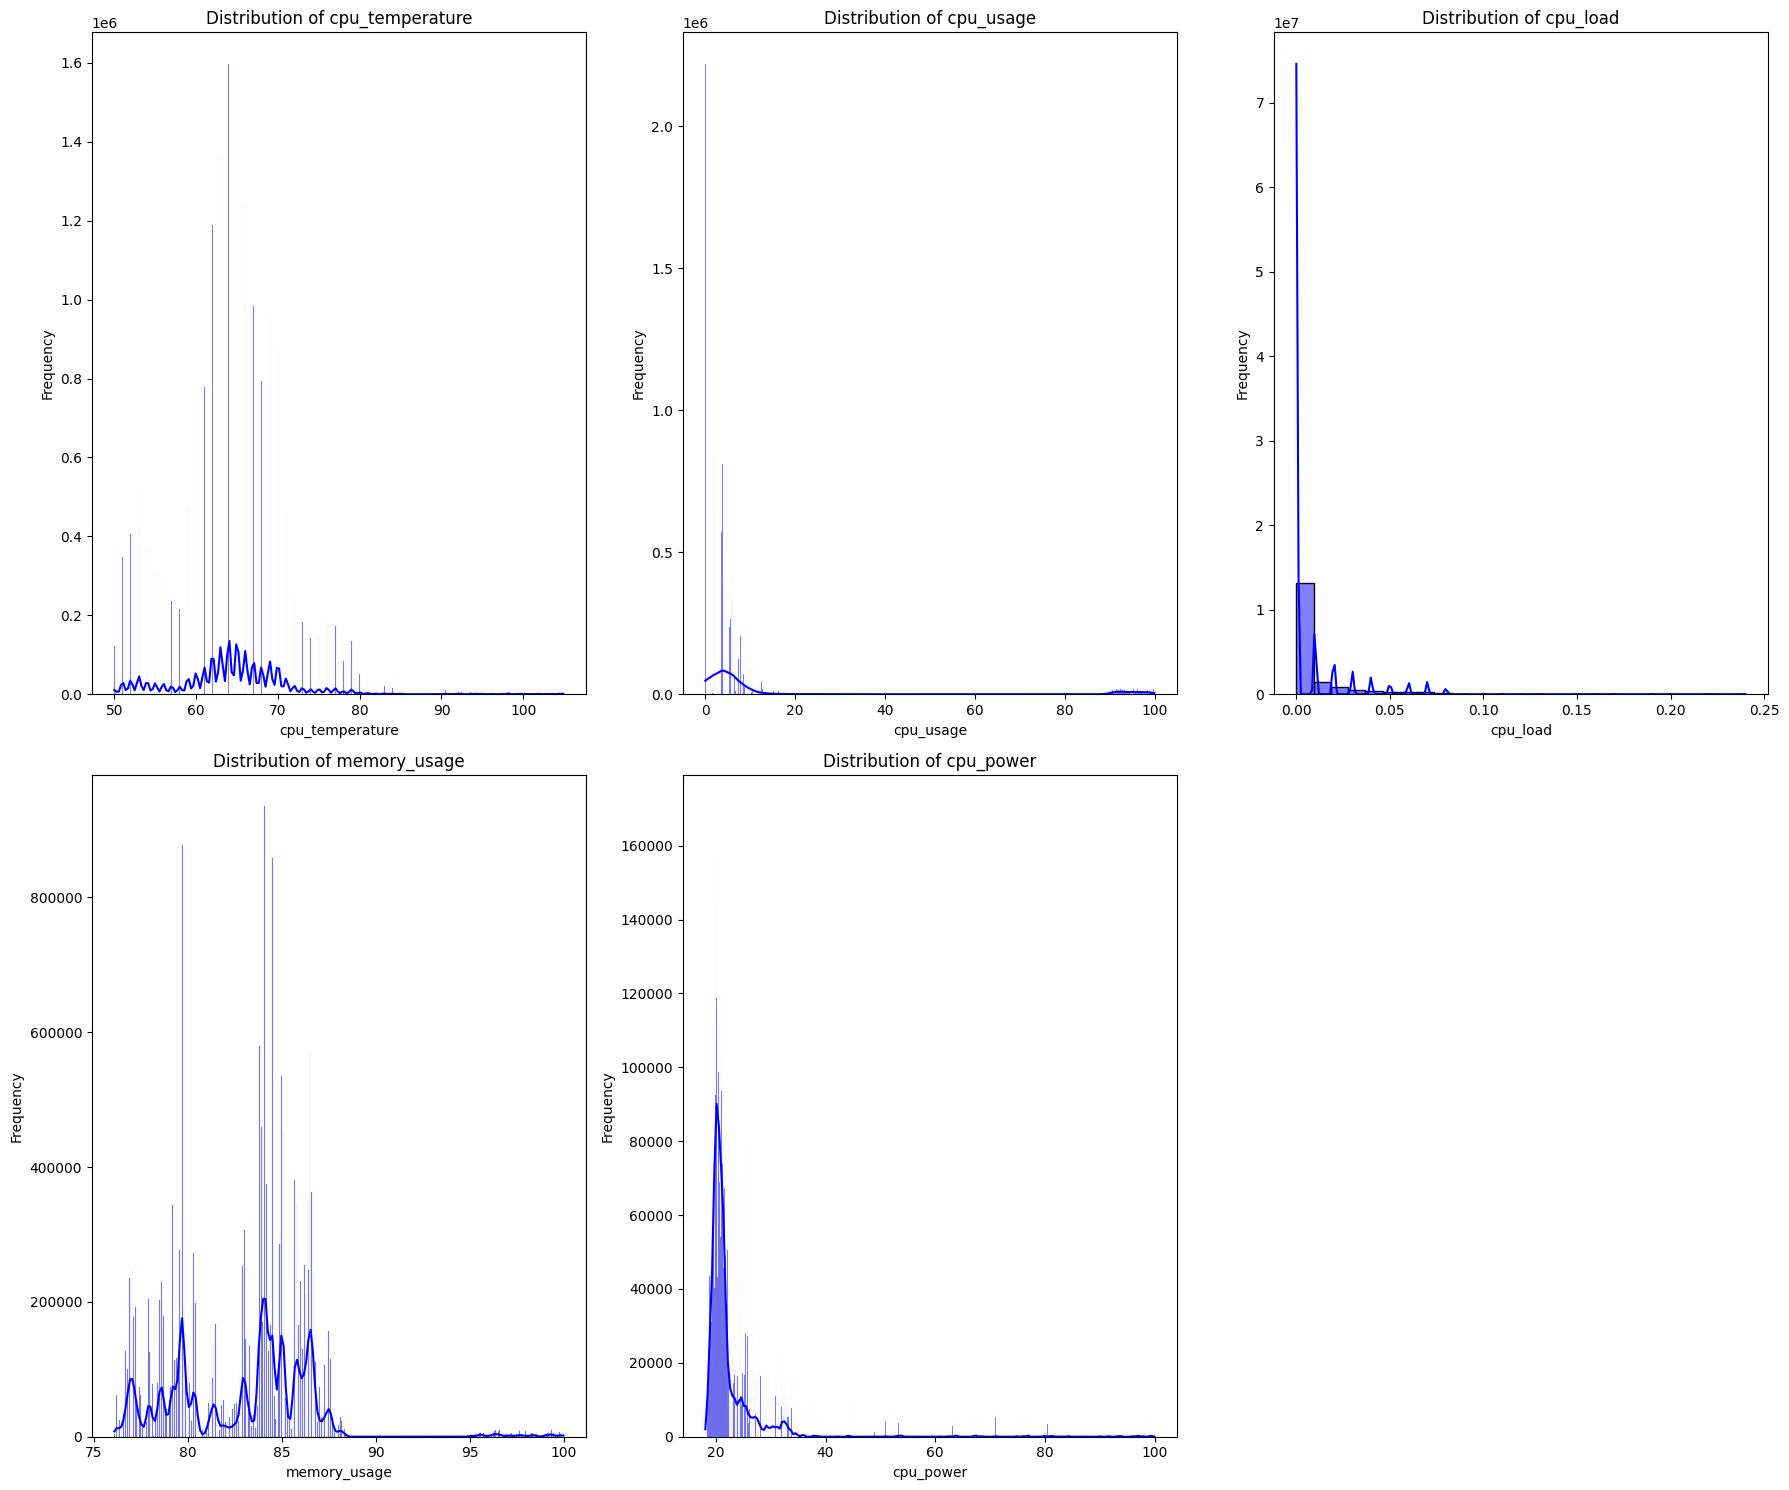

In [8]:
# Visualizing the data

columns = ['cpu_temperature', 'cpu_usage', 'cpu_load', 'memory_usage', 'cpu_power']

# In the columns, we have not taken the following features
# 1- timestamp, because it cannot tell us more about the dataset, because it is linearly increasing
# 2- battery level, because during the generation of data, my system was on charging and the battery was full(100%), actually I did this intensionally.

plt.figure(figsize=(18,15))

for i, col in enumerate(columns, start = 1):
    plt.subplot(2, 3, i)
    sns.histplot(data = df, x = col, kde=True, color='blue')
    plt.title(f"Distribution of {col}", fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Frequency", fontsize=10)

plt.tight_layout()
plt.show()

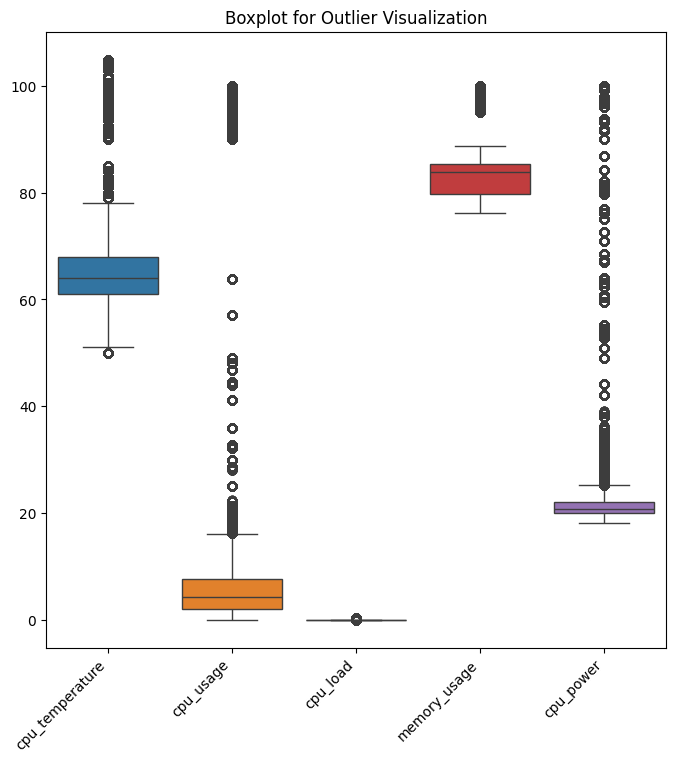

In [9]:
# VIsualizing boxplot - Outlier VIsualizing

fig, ax = plt.subplots(figsize=(8, 8))
# Correctly selecting columns as a list
columns_to_plot = ['cpu_temperature', 'cpu_usage', 'cpu_load', 'memory_usage', 'cpu_power']
sns.boxplot(data=df[columns_to_plot], ax=ax)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title("Boxplot for Outlier Visualization")
plt.show()


In [10]:
# Creating a copy of original dataset for performing outlier removal

df_new = df.copy()  # FOR  ISOLATION FOREST
df_new2 = df.copy()  # FOR ONE-CLASS SVM


##### Anomaly Detection - Isolation Forest

In [11]:
from sklearn.ensemble import IsolationForest

In [12]:
X = df_new[columns]

In [13]:
# Isolation Forest Initialization
forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df_new['anomaly'] = forest.fit_predict(X)

In [14]:
# Filtering the rows where anomaly = -1 (anomalous data)
anomalies = df_new[df_new['anomaly'] == -1]

# Displaying the anomalies
print("Anomalies detected:")
print(anomalies)

Anomalies detected:
                           timestamp  cpu_temperature  cpu_usage  cpu_load  \
405       2024-11-28 13:14:52.472585        90.428998  93.173664      0.00   
433       2024-11-28 13:14:52.472585        90.428998  93.173664      0.00   
462       2024-11-28 13:14:52.472585        90.428998  93.173664      0.00   
464       2024-11-28 13:14:53.296910        70.000000  12.800000      0.00   
492       2024-11-28 13:14:52.472585        90.428998  93.173664      0.00   
...                              ...              ...        ...       ...   
17302468  2024-11-28 13:54:16.270155        68.000000  94.102378      0.03   
17302470  2024-11-28 13:54:17.204368        74.000000  30.000000      0.03   
17302473  2024-11-28 13:54:18.560543        65.000000  99.313164      0.03   
17302514  2024-11-28 13:54:36.681362        53.000000  96.170406      0.02   
17302597  2024-11-28 13:55:13.471181        68.000000  99.847758      0.01   

          memory_usage  battery_level  cpu_

In [15]:
# Creating custom labels of Anomaly for Interpretation:
# -1 = anomaly
# 1 = normal

df_new['anomaly'] = df_new['anomaly'].map({1: 'Normal', -1: 'Anomaly'})

In [16]:
df_new.shape

(17302606, 8)

In [17]:
df_new.sample(5)

,timestamp,cpu_temperature,cpu_usage,cpu_load,memory_usage,battery_level,cpu_power,anomaly
3886731,2024-11-28 13:21:13.673729,66.0,1.900000,0.00,84.0,100.0,20.888411,Normal
7107501,2024-11-28 13:29:44.189755,55.0,92.416958,0.00,81.8,100.0,18.835360,Normal
10359259,2024-11-28 13:18:09.611618,66.0,5.800000,0.00,85.7,100.0,24.983734,Normal
1616398,2024-11-28 13:16:16.616973,63.0,5.600000,0.03,86.6,100.0,22.119898,Normal
12494085,2024-11-28 13:20:46.671405,51.0,2.000000,0.00,84.1,100.0,19.812298,Normal


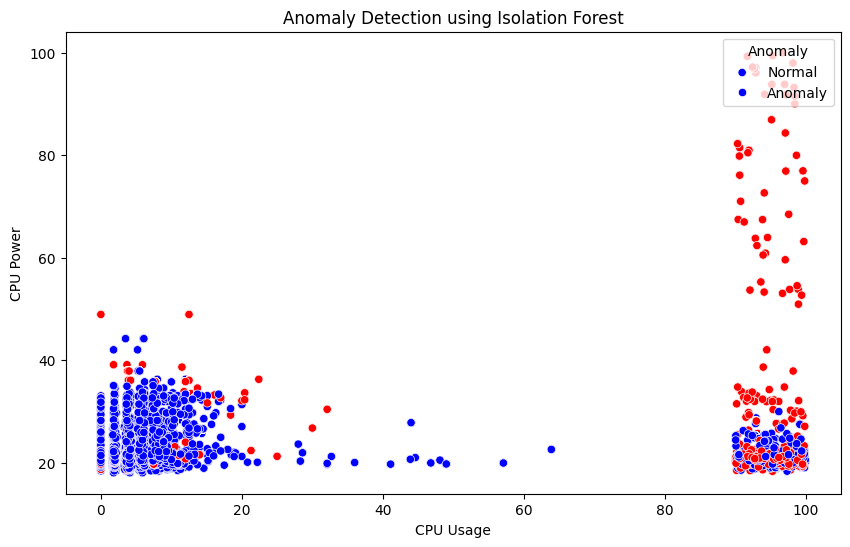

In [24]:
# Lets visualize anomaliess

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_new, x='cpu_usage', y='cpu_power', hue='anomaly', palette={"Normal" : 'blue', "Anomaly" : 'red'})
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('CPU Usage')
plt.ylabel('CPU Power')
plt.legend(['Normal', 'Anomaly'], title='Anomaly', loc='upper right')

plt.show()

In [19]:
print(df_new['anomaly'].unique())

['Normal' 'Anomaly']


In [20]:
# Saving the updated dataset with anomaly labels
df_anomaly = r"C:\Users\Hrutik M Chaudhari\OneDrive\Desktop\Internship task\df_anomaly_csv.csv"  # Replace with your desired output file path
df_new.to_csv(df_anomaly, index=False)

C:\Users\Hrutik M Chaudhari\AppData\Local\Temp\ipykernel_5568\1732753636.py:25: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Hrutik M Chaudhari\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


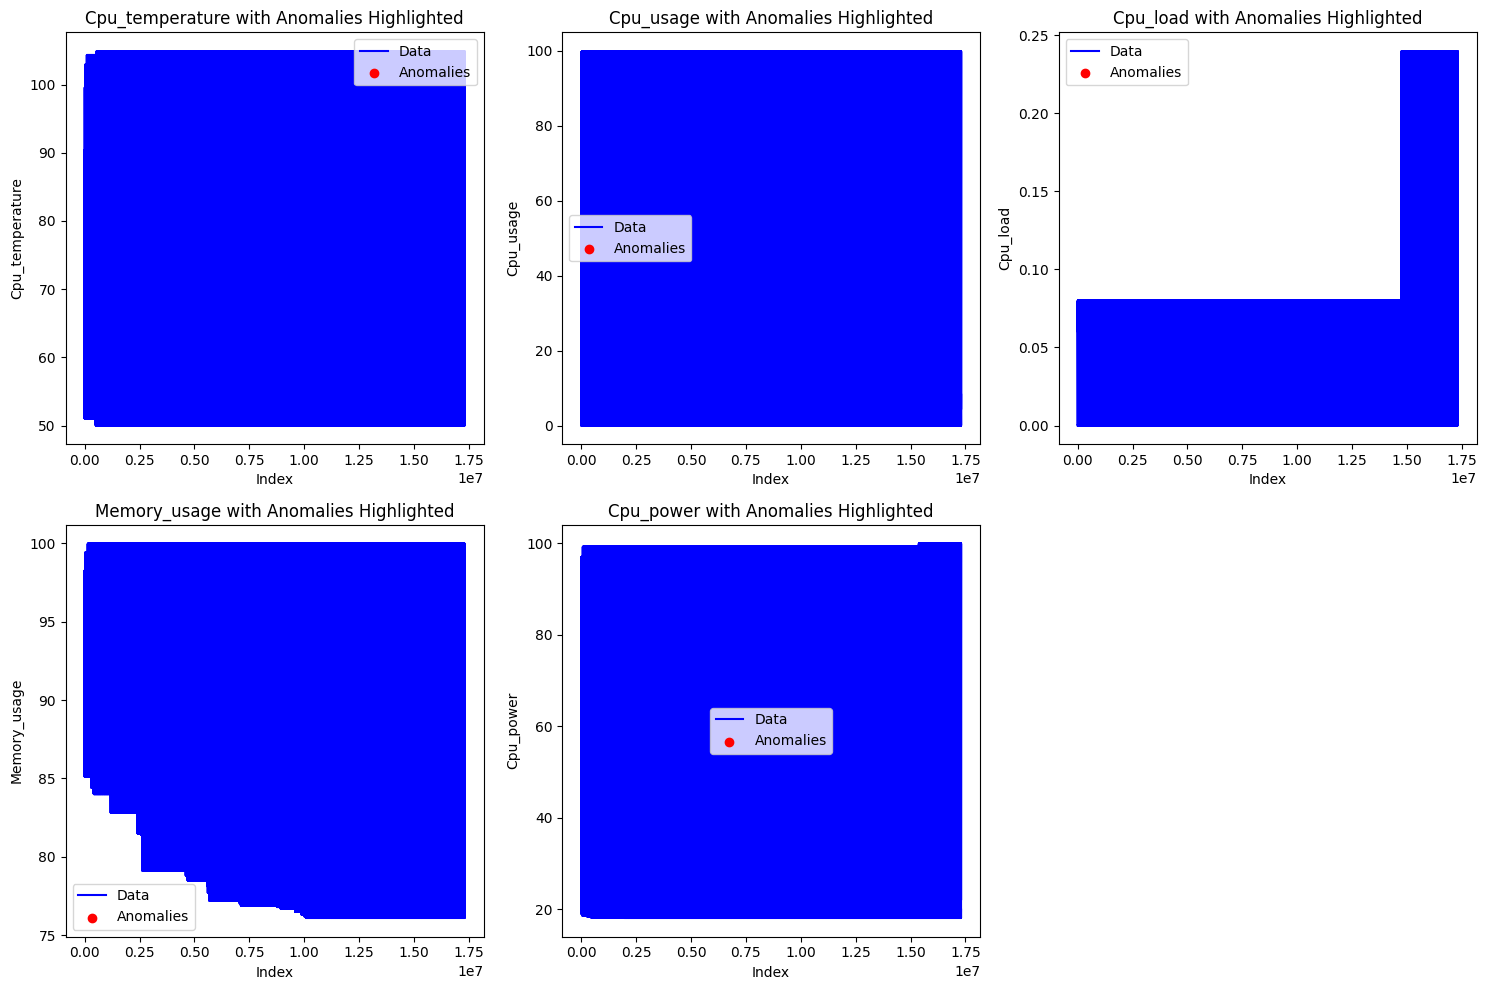

In [23]:
# Assuming anomaly_df and df are the same DataFrame or that their indices match
plt.figure(figsize=(15, 10))  # Adjust the figure size

for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)  # Create a grid of subplots (2 rows, 3 columns)
    
    # Plot the feature data
    plt.plot(df_new.index, df_new[col], label='Data', color='blue')
    
    # Highlight anomalies
    plt.scatter(
        df_new.index[df_new['anomaly'] == -1],  # Use anomaly_df for consistency
        df_new[col][df_new['anomaly'] == -1],  # Same here
        color='red', 
        label='Anomalies'
    )
    
    # Add titles and labels
    plt.title(f'{col.capitalize()} with Anomalies Highlighted')
    plt.xlabel('Index')
    plt.ylabel(col.capitalize())
    plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


At this point after the visualization, anomalies we not detected properly so I thought I should visualize the data in small chunks

In [34]:
print(df_new['anomaly'].value_counts())  # Ensure there are -1 values for anomalies

anomaly
Normal     16440254
Anomaly      862352
Name: count, dtype: int64


In [36]:
print(df_new.index)  # Check if the index is consistent

RangeIndex(start=0, stop=17302606, step=1)


In [37]:
print(df_new.columns)  # Verify the column names in df_new

Index(['timestamp', 'cpu_temperature', 'cpu_usage', 'cpu_load', 'memory_usage',
       'battery_level', 'cpu_power', 'anomaly'],
      dtype='object')


In [38]:
# Check if anomalies are detected
anomalies = df_new[df_new['anomaly'] == -1]
print(f"Number of anomalies detected: {len(anomalies)}")

Number of anomalies detected: 0


C:\Users\Hrutik M Chaudhari\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


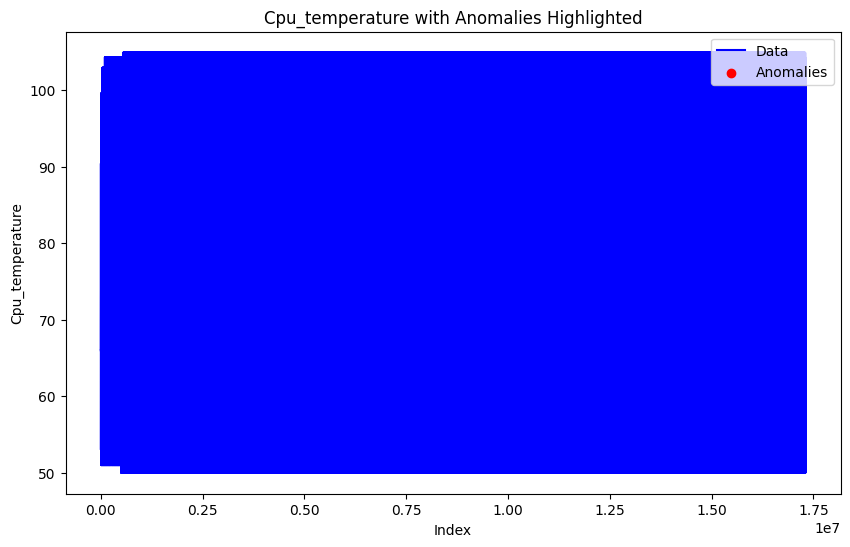

In [39]:
col = 'cpu_temperature'  # Example column
plt.figure(figsize=(10, 6))
plt.plot(df_new.index, df_new[col], label='Data', color='blue')
plt.scatter(
    df_new.index[df_new['anomaly'] == -1],
    df_new[col][df_new['anomaly'] == -1],
    color='red',
    label='Anomalies'
)
plt.title(f'{col.capitalize()} with Anomalies Highlighted')
plt.xlabel('Index')
plt.ylabel(col.capitalize())
plt.legend()
plt.show()

In [35]:
df_new.shape

(17302606, 8)

In [33]:
print(f"Number of anomalies: {anomalies.shape[0]}")


Number of anomalies: 0


In [ ]:
# Loading another dataset

anomaly_df_Isolation = pd.read_csv("df_anomaly_isolation_csv.csv")
anomaly_df_Isolation.sample(5)

##### Anomaly Detection - ONE-CLASS SVM

In [40]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

# MY DATASET FOR ONE-CLASS SVM is df_new2

In [41]:
# Feature selection (drop irrelevant columns if necessary)
# Replace 'columns_of_interest' with the relevant feature names
# here columns_of_interest for us is X defined below

X_svm = df_new2[columns]

# Normalizing the data (Standardization)

scaler = StandardScaler()
svm_scaled = scaler.fit_transform(X_svm)

#### NOTE: For building the model of One-Class SVM, machine is taking very much time as the dataset is very large

In [ ]:
# One-Class SVM Model building
svm_model = OneClassSVM(nu=0.05, kernel='rbf', gamma=0.1)  # Adjust 'nu' and 'gamma' as needed
svm_model.fit(svm_scaled)

In [ ]:
# Predicting anomalies (-1 = anomaly, 1 = normal)
df_new2['anomaly'] = svm_model.predict(svm_scaled)

In [ ]:
# Filtering anomalies
anomalies = df_new2[df_new2['anomaly'] == -1]
normal_data = df_new2[df_new2['anomaly'] == 1]

In [ ]:
# Returning rows with anomaliesl̥,,
print(f"Number of anomalies: {len(anomalies)}")
print(anomalies)

In [ ]:
# Specifying the two features for visualization - testing 
feature_x = 'cpu_temperature'
feature_y = 'cpu_usage'

# Extracting columns which corrosponds to the features
x = df_new2[feature_x]
y = df_new2[feature_y]

# Plot anomalies
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c='blue', label='Normal Data')

# Filter anomaly points for plotting
anomalies = df_new2[df_new2['anomaly'] == -1]
plt.scatter(anomalies[feature_x], anomalies[feature_y], c='red', label='Anomalies')

plt.title('Detection of Anomalies using One-Class SVM')
plt.xlabel(feature_x.capitalize())
plt.ylabel(feature_y.capitalize())
plt.legend()
plt.show()


In [ ]:
from itertools import combinations

# Creating pairwise combinations of features
pairs = list(combinations(['cpu_temperature', 'cpu_usage', 'cpu_load', 'memory_usage', 'cpu_power'], 2))

plt.figure(figsize=(20, 15))

# Iterating over pairs and creating subplots and plotting them
for i, (feature_x, feature_y) in enumerate(pairs, 1):
    plt.subplot(3, 3, i)
    x = df_new2[feature_x]
    y = df_new2[feature_y]
    plt.scatter(x, y, c='blue', label='Normal Data')

    # Highlight anomalies
    anomalies = df_new2[df_new2['anomaly'] == -1]
    plt.scatter(anomalies[feature_x], anomalies[feature_y], c='red', label='Anomalies')

    plt.title(f'Anomalies: {feature_x.capitalize()} vs {feature_y.capitalize()}')
    plt.xlabel(feature_x.capitalize())
    plt.ylabel(feature_y.capitalize())
    plt.legend()

plt.tight_layout()
plt.show()
